# import

In [7]:
import numpy as np
import pandas as pd

from Ocab import Ocab, Regexp # https://github.com/boomin614/Ocab
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

# function to tokenize Japanese sentences

In [2]:
replace_rule = {
    '名詞': {
        '非自立': "",
        '固有名詞': {
            '人名': "",
            '地域': "{地名}"
        }
    }
}
ocab = Ocab( # Ocabクラスの形態素解析用インスタンスを作成。
    opO="-Ochasen -u /path_to_user_dic_directory/mecab_user_dic.dic", # ユーザ辞書を指定します。
    target=["名詞", "形容詞", "形容動詞", "動詞"], replace_rule=replace_rule)

c = Regexp()

def tokenize(text):
    if type(text) != type(""):
        text = str(text)
    text = text.replace("\r","")
    text = text.replace("\n","。") + "。"
    text = c.normalize(text)
    text = ocab.wakati(text)
    if type(text) != type(""):
        text = ""
    text = ocab.removeStoplist(text, [])
    
    return text.split()

# training on your own corpora

In [75]:
class Corpus2iter(object):
    def __init__(self, file_path):
        self.file_path = file_path
    
    def __iter__(self):
        for line in open(self.file_path):
            yield tokenize(line)

In [76]:
texts = Corpus2iter('data.txt')

In [77]:
model = Word2Vec(texts, min_count=10, window=5)
model.save("model/word2vec.model")

# visualizing with t-SNE
ここではt-SNEのグラフのサンプルを示すため、下記から拝借した訓練済みモデルを用います。

https://github.com/Kyubyong/wordvectors

In [9]:
model = Word2Vec.load("pretrained_word_embeddings/wiki_ja/ja.bin")

In [45]:
vocab_size = len(model.wv.vocab)
corpora_matrix = np.vstack([model.wv.get_vector(model.wv.index2word[i]) for i in range(0, vocab_size)])

In [69]:
tsne = TSNE(n_components=2, random_state=0)
tsne_fitted = tsne.fit_transform(corpora_matrix)

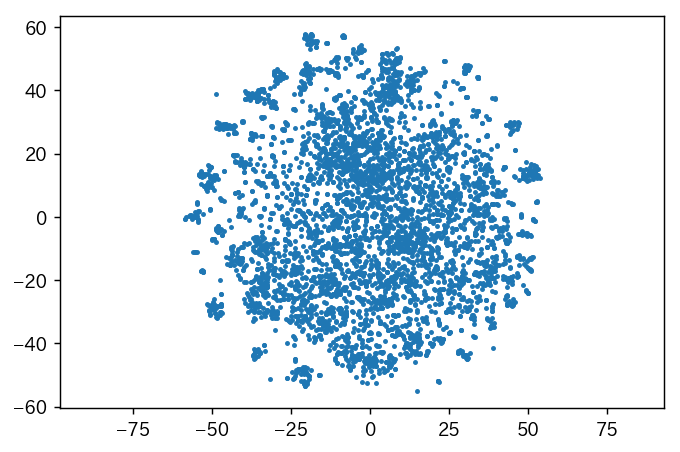

In [70]:
idx = np.random.randint(low=0, high=vocab_size, size=5000)

fig, ax = plt.subplots()
ax.scatter(tsne_fitted[idx, 0], tsne_fitted[idx, 1],
    s=3
)
ax.axis("equal")

fig.set_dpi(130)
plt.show()